In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

penguins = sns.load_dataset('penguins').dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Quantity of penguins by species:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Estatistics of the dataset:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


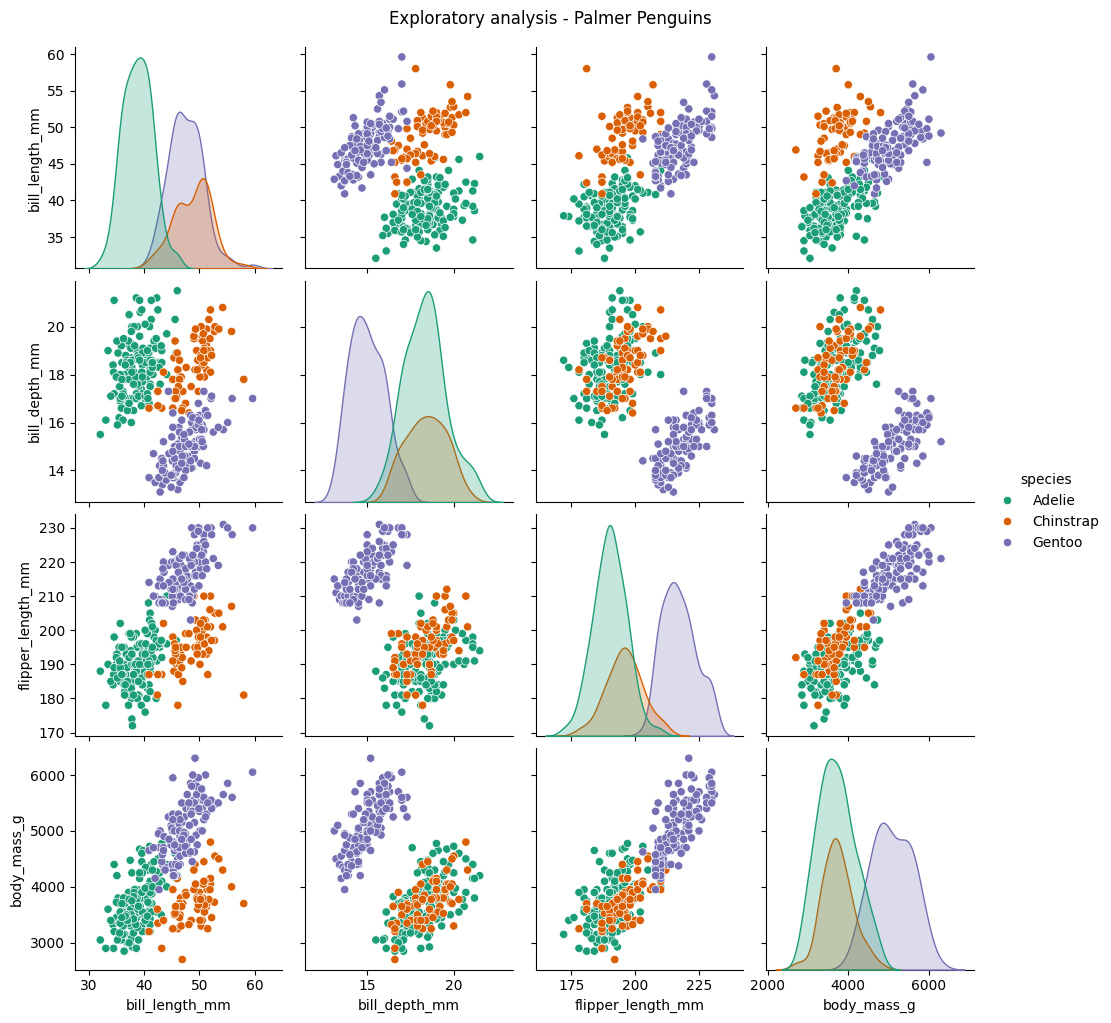

In [72]:
# Simple Exploratory analysis
print('Quantity of penguins by species:')
print(penguins['species'].value_counts())
print('\nEstatistics of the dataset:')
print(penguins.describe())

sns.pairplot(penguins, hue='species', palette='Dark2')
plt.suptitle('Exploratory analysis - Palmer Penguins', y=1.02)
plt.show()

Exercício 7: Preparando os Dados
Com a base de dados "Pinguins", escreva um código em Python para separar os dados em conjuntos de treino e validação. Observe que iremos criar um classificador que diferencia a espécie "Adelie" das outras duas.

In [73]:
# Convert species to binary classification (Adelie vs. others)
penguins['target'] = penguins['species'].apply(lambda x: 1 if x == 'Adelie' else 0)

# Define features and target variable
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]
y = penguins['target']

# Standardize the features (std=1, mean=0)
# KNN and SVM are sensitive to the scale of the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

print(penguins['target'].value_counts())


target
0    187
1    146
Name: count, dtype: int64


Exercício 8: Construção do Modelo Inicial
Utilizando a biblioteca Scikit-Learn, escreva um código em Python para construir um modelo de Machine Learning usando o algoritmo de K-Nearest Neighbors com a base de dados "Pinguins".

In [74]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN classifier
# Use 5 neighbors for KNN (Default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Exercício 9: Avaliação do Modelo
Após treinar o modelo de K-Nearest Neighbors com a base de dados "Pinguins", escreva um código para avaliar a acurácia do seu modelo nos dados de validação.

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the validation set
y_pred = knn.predict(X_val)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)


print('Adelie vs outras espécies:')
# The accuracy score is the ratio of correctly predicted instances to the total instances
print(f"\nAcurácia: {accuracy:.2f}")

print("\nRelatório de Classificação:")
# The classification report includes precision, recall, f1-score, and support for each class
# The support is the number of occurrences of each class in y_true
# Precision is the ratio of correctly predicted positive observations to the total predicted positives
# Recall (sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class
# F1 Score is the weighted average of Precision and Recall
print(classification_report(y_val, y_pred))

print("\nMatriz de Confusão:")
# The confusion matrix shows the number of correct and incorrect predictions for each class
# [[TN  FP]  True Negative - False Positive
#  [FN  TP]] False Negative - True Positive
print(confusion_matrix(y_val, y_pred))

Adelie vs outras espécies:

Acurácia: 0.98

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.96      1.00      0.98        44

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Matriz de Confusão:
[[54  2]
 [ 0 44]]


Exercício 11: Aprofundamento
Baseado nos exercícios anteriores, crie um novo modelo de classificação binário, agora para classificar os pinguins da classe Gentoo versus as outras espécies. O desempenho deste modelo é pior ou melhor do que o primeiro modelo criado?

In [57]:
# Convert species to binary classification (Gentoo vs. others)
penguins['target_gentoo'] = penguins['species'].apply(lambda x: 1 if x == 'Gentoo' else 0)
y_gentoo = penguins['target_gentoo']

# Split the dataset into training and validation sets (70% train, 30% validation)
# Use the same features and scaled data
X_train_gentoo, X_val_gentoo, y_train_gentoo, y_val_gentoo = train_test_split(
    X_scaled, y_gentoo, 
    test_size=0.3, 
    random_state=42,
    stratify=y_gentoo
)

# Create and train the KNN classifier
knn_gentoo = KNeighborsClassifier(n_neighbors=5)
knn_gentoo.fit(X_train_gentoo, y_train_gentoo)

# Make predictions on the validation set
y_pred_gentoo = knn_gentoo.predict(X_val_gentoo)
# Calculate accuracy
accuracy_gentoo = accuracy_score(y_val_gentoo, y_pred_gentoo)

print('Gentoo vs outras espécies:')
print(f"\nAcurácia: {accuracy_gentoo:.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_val_gentoo, y_pred_gentoo))

print("\nMatriz de Confusão Gentoo:")
print(confusion_matrix(y_val_gentoo, y_pred_gentoo))

Gentoo vs outras espécies:

Acurácia: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Matriz de Confusão Gentoo:
[[64  0]
 [ 0 36]]
